## Assignment 1 : Linear Regression and FDR.
### BAX 452 Yi Yin "Ian" Chen


- Importing data

In [29]:
#Importing pandas
import pandas as pd
import numpy as np
#Importing csv data
df = pd.read_csv('/Users/ianchen/MSBA/BAX452 Machine Learning/Python/fundamentals.csv')
#Count NAs and remove
na_count = df.isna().sum()
print(na＿count)
df_clean = df.dropna()
#Check results
print(df)
print(df_clean)

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64
      Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0              0           AAL    2012-12-31      3.068000e+09   
1              1           AAL    2013-12-31      4.975000e+09   
2              2           AAL    2014-12-31      4.668000e+09   
3              3           AAL    2015-12-31      5.102000e+09   
4              4           AAP    2012-12-29      2.409453e+09   
...          ...           ...           ...               ...   
1776        1776          ZION    2015-12-31      0.000000e+00   
1777        1777           ZTS    2013-12-31      1

### 1. Data Exploration and Visualization: Explore the “fundamentals.csv”. Include any other plots you find interesting. (10 pts)


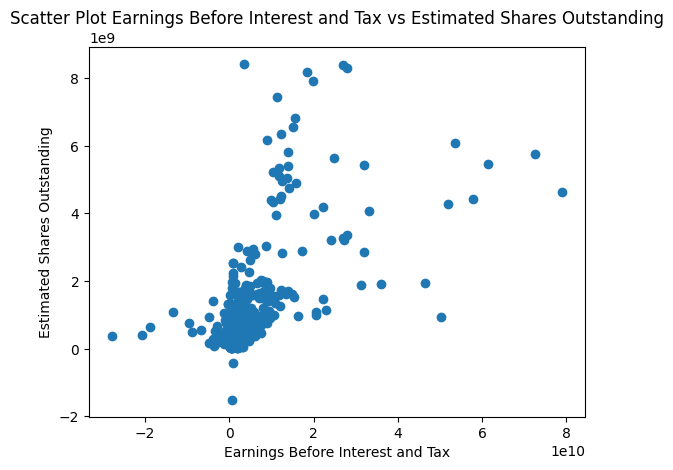

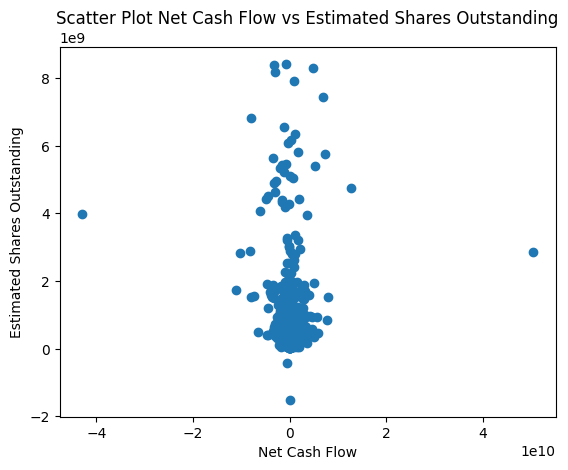

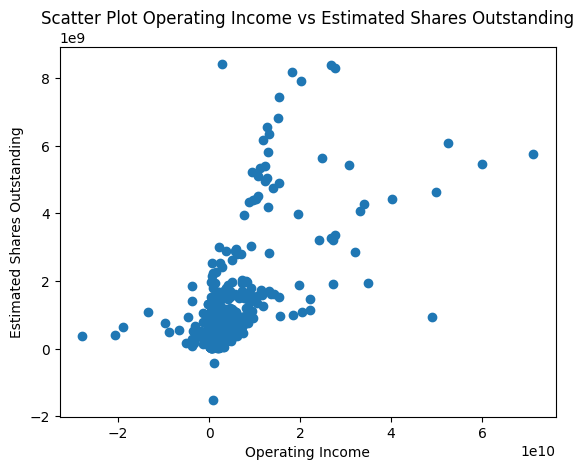

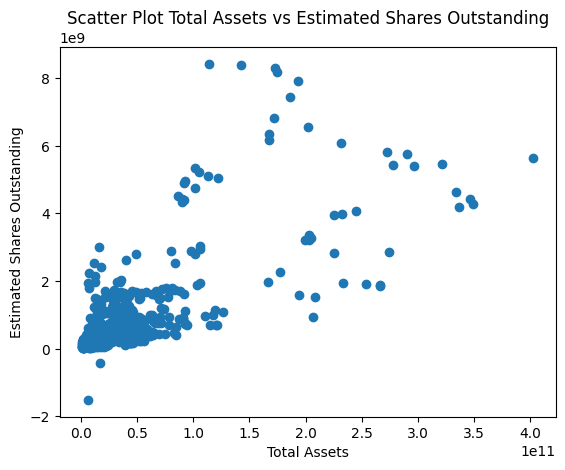

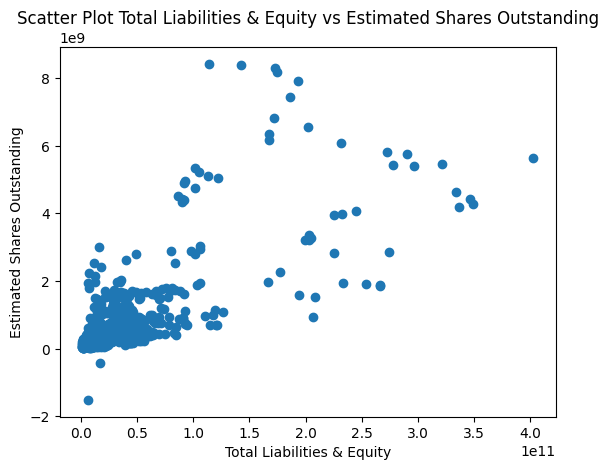

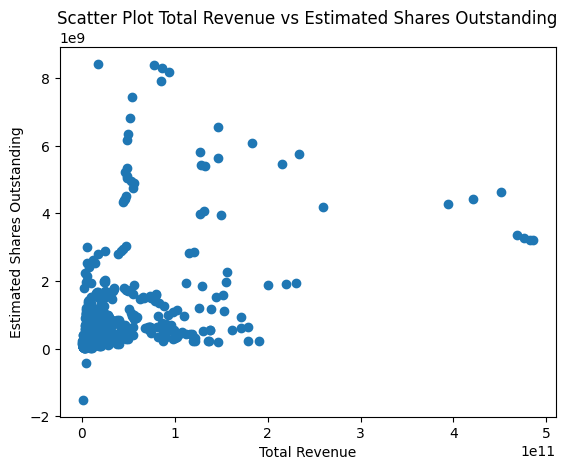

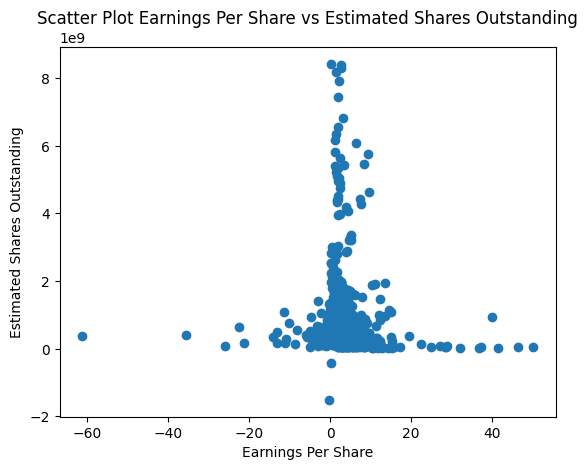

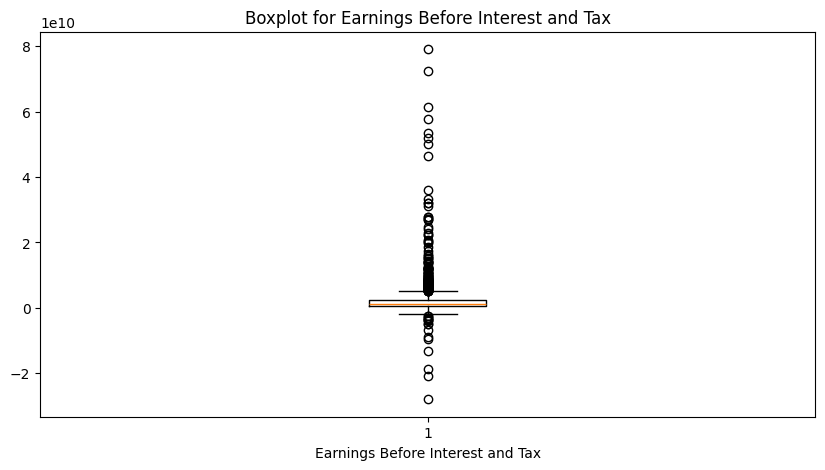

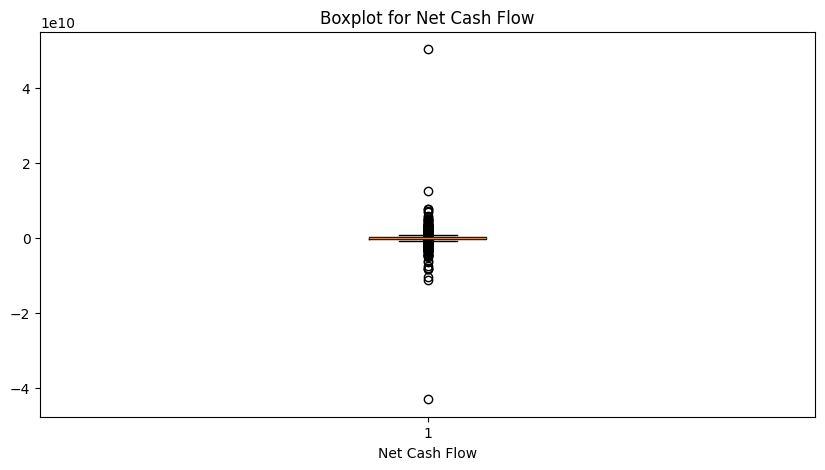

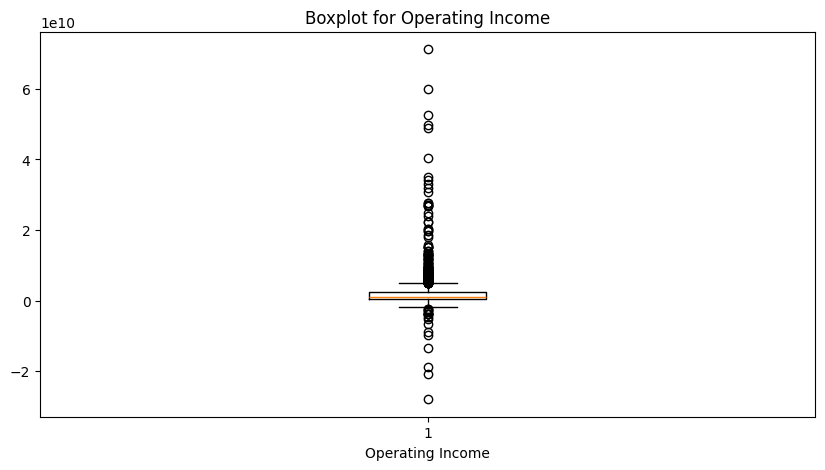

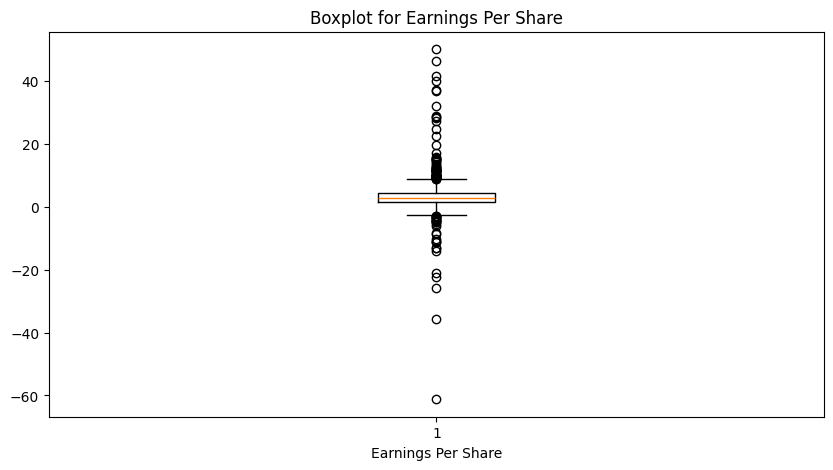

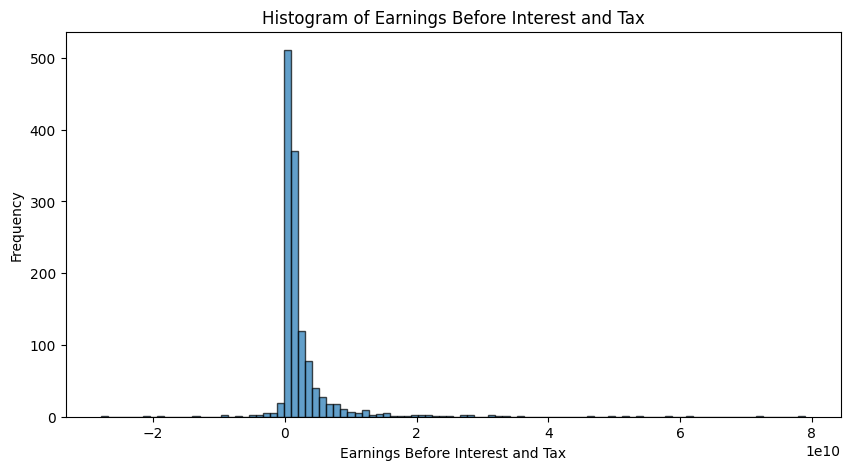

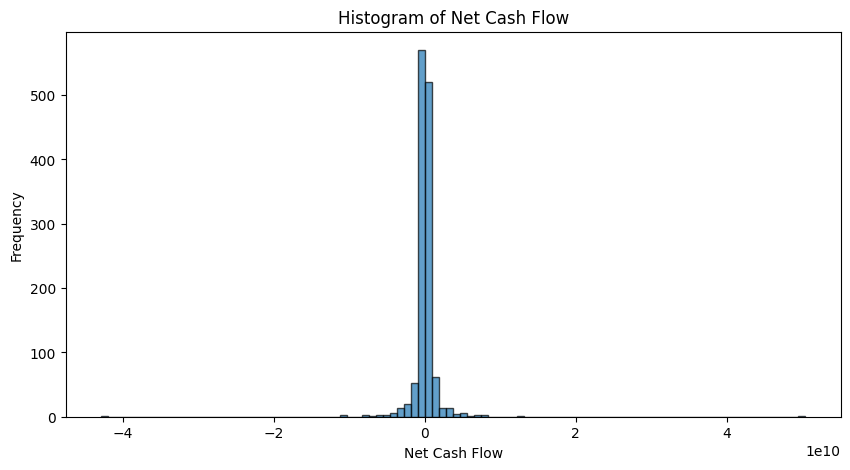

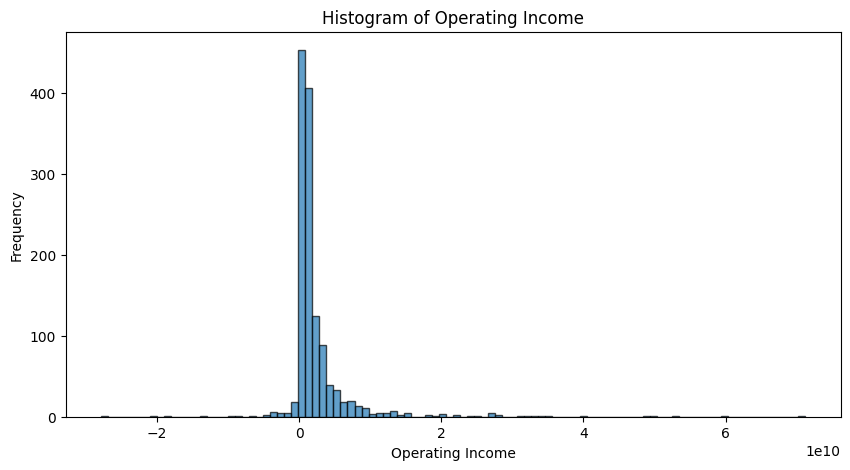

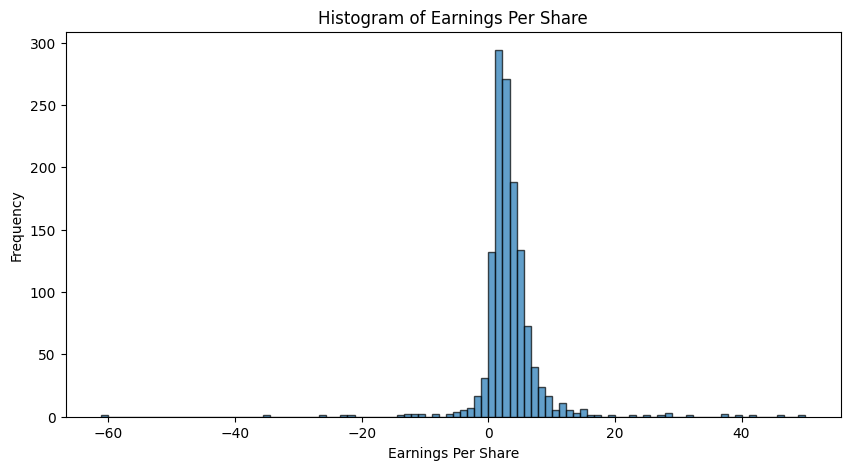

In [30]:
#Import package for plotting
import matplotlib.pyplot as plt
#Drop unused columns for plotting
df_plot = df_clean.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending'], axis = 1)
x_vars = ['Earnings Before Interest and Tax','Net Cash Flow','Operating Income','Total Assets','Total Liabilities & Equity','Total Revenue','Earnings Per Share']
y_vars = ['Estimated Shares Outstanding']
#Loop scatter plots for each variable chosen against Estimated Shares Outstanding
for i in x_vars:
    for j in y_vars:
        plt.scatter(df_plot[i], df_plot[j])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.title(f"Scatter Plot {i} vs {j}")
        plt.show()
#After analyzing the scatter plots, pick out the variables that are clustered to plot box-plot for further analysis
box_var = ['Earnings Before Interest and Tax','Net Cash Flow','Operating Income','Earnings Per Share']
for i in box_var:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_plot[i])
    plt.xlabel(i)
    plt.title(f"Boxplot for {i}")
    plt.show()
#Plot Histograms too
for i in box_var:
    plt.figure(figsize=(10, 5))
    plt.hist(df_plot[i], bins=100, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

### Insights
The original data has 1781 observations and 78 attributes.

The NA values for each attribute is as follows:

- For Year: 173

- Cash Ratio: 299

- Current Ratio: 299

- Quick Ratio: 299

- Earnings Per Share: 219

- Estimated Shares Outstanding: 219

After removing the NA values, the cleaned data has 1299 observations and 78 attributes

After examining the whole dataset and attributes, I selected a few variables that seemed logical to analyze against Estimated Shares Outstanding(y variable). 

I then plotted these variables against y in scatter plots to futher examine. From the plots shown, it is obvious that EBIT, Operating Income, Total Assets, Total Liabilities & Equity and Total Revenue is showing decent relationships with the y variable, which is logical because these variables all somehow represent how a company is performing financialy and thus has a positive relation to the Estimated Shares Outstanding. 

As for Net Cash flow and EPS, it seems that the data is clustered around 0. The same could be seen in some of the other variables which shown relations.
To further analyze the distriburion of these variables, boxplots and histograms served the purpose well, we can see that for variables like EPS, Net Cash Flow, Operating Income and EBIT, data has a centeral tendency possibly due to the nature of the stock market and how companies operate, all of these are shown to cluster in the middle despite certain amount of outliers.


### 2. Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding. Explain your model. (15 pts)


- Import statsmodels for regression

In [31]:
import statsmodels.formula.api as smf

In [32]:
#Clean column names with special characters and spaces
df = df_plot
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace(',','')
df.columns = df.columns.str.replace('/','_')
df.columns = df.columns.str.replace("'",'')
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace("&","and")
df.columns = df.columns.str.replace('-','_')
#Prepare the regression formula for the ols model
formula = 'Estimated_Shares_Outstanding ~' + ' + '.join(df.columns.difference(['Estimated_Shares_Outstanding']))
#Run the ols model
ols_full_model = smf.ols(formula=formula, data = df_plot).fit()
full_model_output = ols_full_model.summary()
#Show the output
full_model_output


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated_Shares_Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                                  22:21:52   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                            7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
Accounts_Payable                                     -183.9454    238.959     -0.770      0.442    -652.760     284.869
Accounts_Receivable                                    -0.0722      0.057     -1.274      0.203      -0.183       0.039
Addl_income_expense_items                               0.0361      0.057      0.635      0.525      -0.075       0.148
After_Tax_ROE                                       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
Capital_Expenditures                                    0.9122      2.396      0.381      0.704      -3.789       5.614
Capital_Surplus                                         0.0149      0.009      1.631      0.103      -0.003       0.033
Cash_Ratio                                           6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
Cash_and_Cash_Equivalents                              -1.2388      0.617     -2.008      0.045      -2.449      -0.029
Changes_in_Inventories                                 -0.0876      0.060     -1.456      0.146      -0.206       0.030
Common_Stocks                                          -0.0014      0.010     -0.143      0.886      -0.020       0.018
Cost_of_Revenue                                      1729.6760   2371.821      0.729      0.466   -2923.605    6382.957
Current_Ratio                                       -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
Deferred_Asset_Charges                                 -0.0585      0.989     -0.059      0.953      -1.999       1.882
Deferred_Liability_Charges                              0.0094      0.099      0.095      0.925      -0.185       0.204
Depreciation                                           -0.0843      0.057     -1.488      0.137      -0.196       0.027
Earnings_Before_Interest_and_Tax                       22.5389     39.533      0.570      0.569     -55.022     100.100
Earnings_Before_Tax                                   -22.8602     39.533     -0.578      0.563    -100.420      54.699
Earnings_Per_Share                                  -3.087e+07   2.81e+06    -10.983      0.000   -3.64e+07   -2.54e+07
Effect_of_Exchange_Rate                                -0.0233      0.166     -0.141      0.888      -0.348       0.302
Equity_Earnings_Loss_Unconsolidated_Subsidiary          0.1119      0.082      1.371      0.171      -0.048       0.272
Fixed_Assets                                           -0.0572      0.989     -0.058      0.9

In [33]:
import numpy as np
#Calculate RMSE
predictions_full = ols_full_model.predict(df.drop('Estimated_Shares_Outstanding', axis = 1))
residuals = df['Estimated_Shares_Outstanding']-predictions_full
#Calculate MSE
mse = np.mean(residuals**2)
#Calculate RMSE
rmse = np.sqrt(mse)
rmse

380263471.15317816

In [34]:
#Find the predictors that have significant p-value under 0.05 significance level
#Extract the pvalues and coefficients from the model
pvalues = ols_full_model.pvalues
coefficients = ols_full_model.params
extract = pd.DataFrame({'Coefficient': coefficients,'pvalue': pvalues}).reset_index()
#Select predictors with pvalues <= 0.05
significant_p = extract[extract['pvalue']<= 0.05]
significant_p

,index,Coefficient,pvalue
8,Cash_and_Cash_Equivalents,-1.238828e+00,4.484996e-02
18,Earnings_Per_Share,-3.087098e+07,7.831145e-27
26,Income_Tax,1.561858e-01,1.931908e-02
29,Inventory,-1.254831e+00,4.254612e-02
35,Misc_Stocks,3.429781e-01,1.200947e-02
36,Net_Borrowings,1.033327e-01,5.861265e-07
39,Net_Cash_Flows_Financing,-2.019483e-01,2.623028e-02
45,Net_Receivables,-1.266714e+00,4.042291e-02
46,Non_Recurring_Items,4.565924e-02,3.622031e-02
47,Operating_Income,1.820131e-01,1.686630e-03


### Insights & Interpretation
- The model's R-squared value is 0.854, indicating that apporximately 85.4% of the variance in the Estimated Shares Outstanding can be explained by the full model.

- The overal F-statistic is 98.4 and its p-value is signigicantly low, indicating the full model might be a good fit not considering other factors like multicollinearity.

- The p-values for Cash and Cash Equivalents, Earnings Per Share, Income Tax, Inventory, Misc Stocks, Net Borrowings, Net Cash Flows Financing, Net Receivables, Non Recurring Items, Operating Income, Operating Margin, Other Current Assets, Other Financing Activites, Pre Tax Margin, Research and Development, Sale and Purchase of Stock and Short Term Investments are significant at the 0.05 significance level, suggesting the listed predictors have a significant effect on Estimated Shares Outstanding.

- The other predictors does not show signigicance at the 0.05 level, implying that with other variables held constant, they do not provide significant predictive power to the Estimated Shares Outstanding.

- The Intercept is around 731 million, suggesting that with every thing else held constant, this is the baseline amount of outstanding shares for a given company listed.

- The coefficients for the significant predictors can be interpreted as, holding other predictors constant, each unit change in the predictar would result to the corresponding coefficient value change in the Estimated Shares Outstanding.

### 3. Multicollinearity in Linear Regression: Explain how multicollinearity can affect the interpretation of a linear regression model's coefficients. (Written) (10 pts)

### Answer
Multicollinearity in Linear Regression can cause several problems when we are trying to draw inferential analysis from the model, especially in a model with multiple variables like this one. A few things multicollinearity can impact the coefficients are as follows.

- The coefficients tend to be unstable, any changes in our data could lead to a signigicant change in the coefficients, this leaves the interpretation of the coefficients of little use when multicollinearity is high in a model.

- The p-values of the predictors might show statistically insignificant even if it actually is an important predictor, this leads to the difficulty of identifying the important predictors and their individual effect on the dependent variable.

- Though multicollinearity is not a huge concern when predicting the dependent variable, it still makes interpreting the model and the coefficients of the predictors highly difficult.

- The attribution of the effect to the coefficients might be incorrect and biased, making it hard to single out which variable is driving the change.

### 4. P-Value Analysis and Histogram: Create a histogram of the p-values. Is there any skewedness? Provide your explanation. (10 pts)

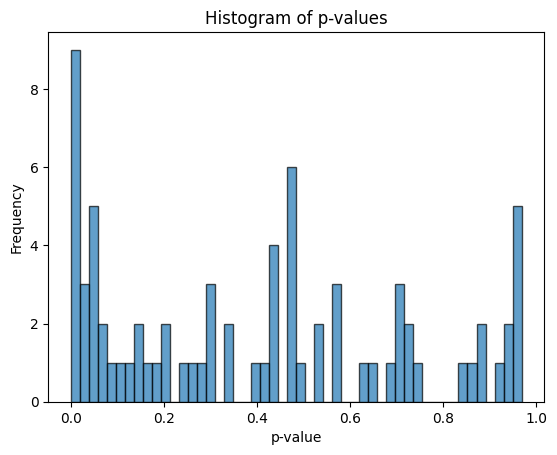

In [35]:
#Plot histogram from the p-values extracted
plt.hist(extract.iloc[1:]['pvalue'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

### Insights
The p-values from the full model viewed in a histogram view shows several noticeable skewness.

- The overall distribution shows slightly right skewed, having the highest peak near 0.

- There is also a significant peak just below 0.5

- Histogram also shows a peak near 1.0.

- The p-values of this model does not show a uniform distribution, as should be when the null hypothesis is true and there is no effect in the predictos, indicating there might be true effects in the model predictors.

### 5. False Discovery Rate Control with BH Procedure: Given the p values you find, use the BH procedure to control the FDR with a q of 0.1. How many “true” discoveries do you estimate? (15 pts)

In [36]:
#Import Numpy
import numpy as np

Build FDR function

In [37]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha

Alpha: 0.0016866300784808


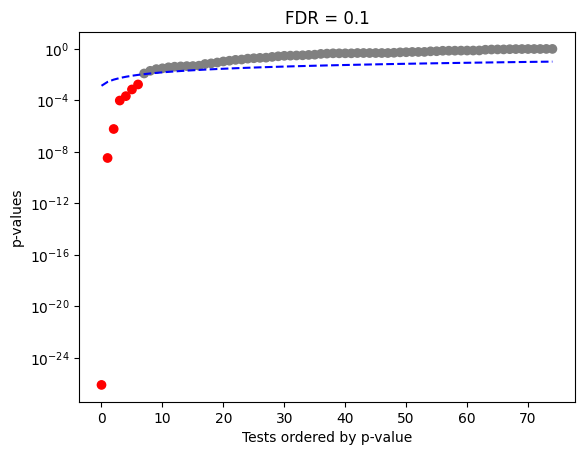

0.0016866300784808

In [38]:
#Prepare the p-values, excluding the intercept
p = extract.iloc[1:]
#Run the FDR function
fdr(p['pvalue'],0.1,plotit=True)

In [39]:
#Count the true discoveries
true = p[p['pvalue']<=0.0016866300784808]
len(true['pvalue'])

7

### True Discovery Estimate
According to the plot and also the count using the alpha threshold, we can estimate there are 7 true discoveries in the model.

### 6. Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables? (10 pts)

In [40]:
#Create a list of q values for sensitivity analysis
q_values = np.arange(0.01,1.01,0.01)
#Create empty list to store the alphas
alphas = []
#Run the sensitivity analysis
for i in q_values:
    alphas.append(fdr(p['pvalue'],i))
#Count the pvalues below threshold to double check
true_counts = []
for i in alphas:
    count = len(p[p['pvalue']<=i])
    true_counts.append(count)

Alpha: 0.0006898272422120684
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.0016866300784808
Alpha: 0.012009468244040417
Alpha: 0.012009468244040417
Alpha: 0.012009468244040417
Alpha: 0.012009468244040417
Alpha: 0.012009468244040417
Alpha: 0.019319084477972523
Alpha: 0.019319084477972523
Alpha: 0.019319084477972523
Alpha: 0.026230283074566152
Alpha: 0.030234586585280068
Alpha: 0.04826867972103088
Alpha: 0.04826867972103088
Alpha: 0.04826867972103088
Alpha: 0.04826867972103088
Alpha: 0.04826867972103088
Alpha: 0.04826867972103088
Alpha: 0.06538837779286008
Alpha: 0.07315079692631232
Alpha: 0.07315079692631232
Alpha: 0.07315079692631232
Alpha: 0.07315079692631232
Alpha: 0.0855470005768516
Alpha: 0.0855470005768516
Alpha: 0.0855470005768516
Alpha: 0.0855470005768516
Alpha: 0.10319312346654869
Alp

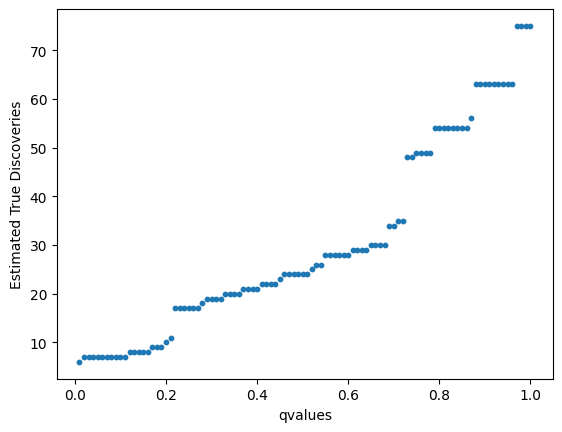

In [41]:
#Create DataFrame and plot q's against expected true discoveries
df = pd.DataFrame({'q_values': q_values, 'true_discoveries': true_counts})
plt.scatter(df['q_values'],df['true_discoveries'], s=10)
plt.xlabel('qvalues')
plt.ylabel('Estimated True Discoveries')
plt.show()

### Sensitivity Analysis
- As shown in the above results and the plot, we can see that the estimates of true findings seems to be stable and robust below 0.2 q value, just above 0.2 the number of estimates doubled.
- As the q value increase, the number of estimates tripled around 0.4 q value.
- Beyond 0.6 q value, the number of estimates starts to increase drastically, probably indicating low robustness of the variables that were found significant under the corresponding q value.
- According to the plot, the ideal cutoff could be around 0.2 false discovery rate, this shows decent robustness of the variables that are found significant.

### 7. Exploring Interaction Terms: (10pts, 5 pts for each)


### a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model.


In [42]:
#Prepare the cleaned dataframe for model
df = df_plot
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace(',','')
df.columns = df.columns.str.replace('/','_')
df.columns = df.columns.str.replace("'",'')
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace("&","and")
df.columns = df.columns.str.replace('-','_')

In [43]:
from sklearn.preprocessing import PolynomialFeatures
#  degree=2 for interaction terms
polynomial_fea = PolynomialFeatures(degree=2, include_bias=False)

# fit and transform the data to create the interaction terms
interaction_fit = polynomial_fea.fit_transform(df.iloc[:, :25])


# feature names for the columns from the Polynomial Features
interaction_features= polynomial_fea.get_feature_names_out(df.iloc[:, :25].columns)

# interaction terms into DataFrame
interactions_df = pd.DataFrame(interaction_fit, columns=interaction_features)
interactions_df

,Accounts_Payable,Accounts_Receivable,Addl_income_expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,...,Gross_Margin^2,Gross_Margin Gross_Profit,Gross_Margin Income_Tax,Gross_Margin Intangible_Assets,Gross_Profit^2,Gross_Profit Income_Tax,Gross_Profit Intangible_Assets,Income_Tax^2,Income_Tax Intangible_Assets,Intangible_Assets^2
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,3364.0,8.326480e+11,-3.300200e+10,5.040200e+10,2.060947e+20,-8.168564e+18,1.247536e+19,3.237610e+17,-4.944610e+17,7.551610e+17
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,3481.0,9.277160e+11,-2.041400e+10,1.363490e+11,2.472442e+20,-5.440504e+18,3.633816e+19,1.197160e+17,-7.996060e+17,5.340721e+18
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,3969.0,1.702890e+12,2.079000e+10,1.411200e+11,7.306209e+20,8.919900e+18,6.054720e+19,1.089000e+17,7.392000e+17,5.017600e+18
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5329.0,2.182262e+12,-2.185620e+11,1.641770e+11,8.936512e+20,-8.950264e+19,6.723161e+19,8.964036e+18,-6.733506e+18,5.058001e+18
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,2500.0,1.549018e+11,1.182020e+10,1.442250e+09,9.597827e+18,7.323881e+17,8.936285e+16,5.588685e+16,6.819073e+15,8.320340e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,-164600000.0,2700000.0,...,5329.0,2.504265e+11,1.607460e+10,4.405550e+10,1.176833e+19,7.553961e+17,2.070307e+18,4.848804e+16,1.328907e+17,3.642122e+17
1295,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,-205400000.0,3000000.0,...,4900.0,2.938040e+11,4.900000e+08,6.122410e+11,1.761649e+19,2.938040e+16,3.670997e+19,4.900000e+13,6.122410e+16,7.649776e+19
1296,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5000000.0,...,3969.0,1.821960e+11,1.178100e+10,5.058900e+10,8.363664e+18,5.408040e+17,2.322276e+18,3.496900e+16,1.501610e+17,6.448090e+17
1297,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5000000.0,...,4096.0,1.963520e+11,1.491200e+10,4.652800e+10,9.412624e+18,7.148440e+17,2.230436e+18,5.428900e+16,1.693910e+17,5.285290e+17


In [44]:
import statsmodels.api as sm
x = sm.add_constant(interactions_df.reset_index(drop=True))
y = df['Estimated_Shares_Outstanding'].reset_index(drop=True)

interaction_model = sm.OLS(list(y), x).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.58
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:21:53   Log-Likelihood:                -26886.
No. Observations:                1299   AIC:                         5.440e+04
Df Residuals:                     983   BIC:                         5.604e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [45]:
# #Select the first 25 variables
# predictors = df.columns[:25].tolist()
# #Count predictors
# num_var = len(predictors)
# #Create every combinations of two variables in the 25 variables list, append to a empty list
# combinations = []
# for i in range(num_var):
#     for j in range(i+1,num_var):
#         combinations.append(predictors[i] + ':' + predictors[j])
# #Append the interaction to the formula
# formula2 = 'Estimated_Shares_Outstanding ~' + ' + '.join(predictors) + '+'
# formula2 = formula2 + '+'.join(combinations)
# formula2
# #Run the ols model
# ols_model = smf.ols(formula=formula2, data = df_plot).fit()
# output = ols_model.summary()
# #Show the output
# output

In [46]:
#Extract pvalues and coefficients
pvalues = interaction_model.pvalues
coefficients = interaction_model.params
extract = pd.DataFrame({'Coefficient': coefficients,'pvalue': pvalues}).reset_index()
#Check if the output has 326 observations, 25 variables + 300 interactions + intercept
len(extract)

351

New OLS regression model built, with interactions between each combination of the first 25 x variables

- 25 predictors

- 300 interactions

- 1 intercept

### b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics.

- Explored in the beginning, most of these variables are either derived from one another (Gross profit, Revenue, EBIT...) or affected by each other (Asset, Equity, Liabilites and Ratios).

- The size, sector or performance of a company can directly affect these variables, and at different levels of one predictor can further affect another predictor's effect on the dependent variable.

- Thus, including interaction terms can improve the model and the predictive power of the model, and fully capture the effect of each predictor and how they affect one anothers ability to effect the Estimated Shares Outstanding.

### 8. Model Evaluation with Interaction Terms: (10pts, 5 pts for each)


### c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics.
### d. Discuss any significant changes in the model's performance or the coefficients of the predictors.

In [47]:
#Select predictors with pvalues <= 0.05
significant_p = extract[extract['pvalue']<= 0.05]
significant_p

,index,Coefficient,pvalue
6,Capital_Surplus,5.561340e-02,0.007770
13,Deferred_Asset_Charges,2.449754e-01,0.043650
21,Goodwill,6.144835e-02,0.032324
25,Intangible_Assets,-1.607078e-01,0.000301
26,Accounts_Payable^2,4.127589e-12,0.031811
...,...,...,...
338,Goodwill Gross_Profit,-7.576762e-12,0.002545
339,Goodwill Income_Tax,5.109154e-11,0.017565
340,Goodwill Intangible_Assets,6.056432e-12,0.012696
349,Income_Tax Intangible_Assets,-5.084433e-11,0.024529


In [48]:
# #Calculate RMSE
# predictions_new = ols_model.predict(df[:25])
# residuals = df['Estimated_Shares_Outstanding']-predictions_new
# #Calculate MSE
# mse = np.mean(residuals**2)
# #Calculate RMSE
# rmse = np.sqrt(mse)
# rmse

### Model Comparison

Original Model

- R-squared: 0.854

- Adjusted R-squared: 0.846

- F-statistic is 98.4, p-value near 0

- 17 significant predictors at the 0.05 level

- AIC: 5.516e+04

- BIC: 5.554e+04

- RMSE: 3.8e+08

New Model

- R-squared: 0.941

- Adjusted R-squared: 0.923

- F-statistic is 53.66, p-value near 0

- 104 significant coefficients at the 0.05 level, 1 intercept, 10 individual predictors and 93 interaction terms

- AIC: 5.444e+04

- BIC: 5.598e+04

- RMSE: 1.55e+08

### Summary

The overall comparison of the two models yield a conclusion that the new model with interaction terms indeed has a better performance.

- Better performing Adjusted R-squared

- Lower RMSE

- Both models are good fits based solely on the F-statistic, AIC and BIC does not show much difference, but the predictors that are shown significant are more in the new model, mainly in the interaction terms, showing that the new model captured more of the effects.

### 9. FDR Analysis with Interaction Terms: (10pts)
### a. Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model. (3pts)


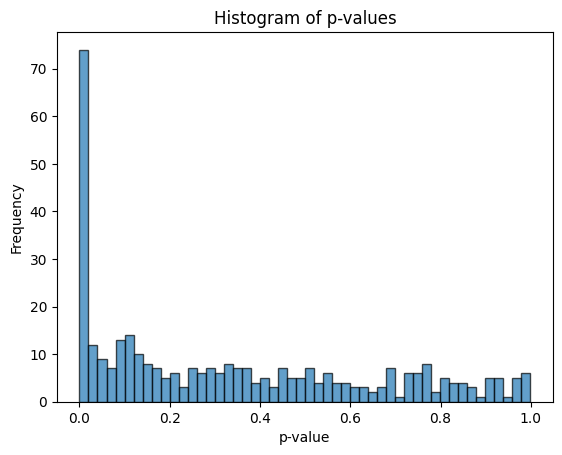

In [49]:
#Plot histogram from the p-values extracted
plt.hist(extract.iloc[1:]['pvalue'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

### Insights
- The p-values of the new model shows a more obvious right skewed distribution

- Shows more of a spike around 0, indicating stronger discovery.

- The rest of the distribution is closer to an uniform distribution compared to the original model.

- No more spike in the middle and near 1.0

### b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. How many significant predictors are identified now, including both main effects and interaction effects? (5pts)

Alpha: 0.018488280187803664


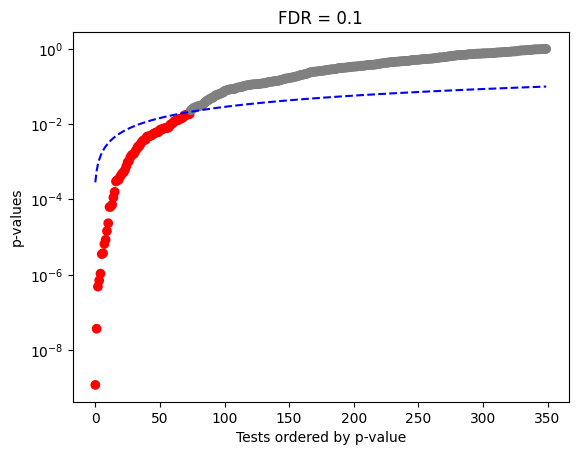

0.018488280187803664

In [50]:
#Prepare the p-values, excluding the intercept
p = extract.iloc[1:]
#Run the FDR function
fdr(p['pvalue'],0.1,plotit=True)

In [51]:
#Count the true discoveries
true = p[p['pvalue']<=0.02475891657190202]
len(true['pvalue'])

76

### True Discovery Estimate
- For the new model, under 0.1 q, the true discovery estimate now is 86

In [52]:
#Create empty list to store the alphas
alphas = []
#Run the sensitivity analysis
for i in q_values:
    alphas.append(fdr(p['pvalue'],i))
#Count the pvalues below threshold to double check
true_counts = []
for i in alphas:
    count = len(p[p['pvalue']<=i])
    true_counts.append(count)

Alpha: 0.0006114423436161905
Alpha: 0.0016350231834399436
Alpha: 0.002980162358136629
Alpha: 0.005116594381783923
Alpha: 0.007989936541149642
Alpha: 0.009934949676761314
Alpha: 0.012696393303400602
Alpha: 0.015198245612636373
Alpha: 0.018488280187803664
Alpha: 0.018488280187803664
Alpha: 0.018488280187803664
Alpha: 0.02452871899008225
Alpha: 0.030005843899905457
Alpha: 0.0323237949376493
Alpha: 0.03460624882519178
Alpha: 0.0384918920032541
Alpha: 0.04068401912273509
Alpha: 0.044125232628618484
Alpha: 0.04794948103920768
Alpha: 0.05012341015069725
Alpha: 0.05409919526961928
Alpha: 0.0600753923206139
Alpha: 0.0600753923206139
Alpha: 0.06461791652436487
Alpha: 0.06908068965568677
Alpha: 0.06908068965568677
Alpha: 0.0778529237368054
Alpha: 0.08651599876539055
Alpha: 0.08651599876539055
Alpha: 0.09689429608114623
Alpha: 0.09858665570373899
Alpha: 0.1103728346291894
Alpha: 0.12395091689569014
Alpha: 0.1275903672712092
Alpha: 0.1418265481200266
Alpha: 0.1418265481200266
Alpha: 0.1535840933310

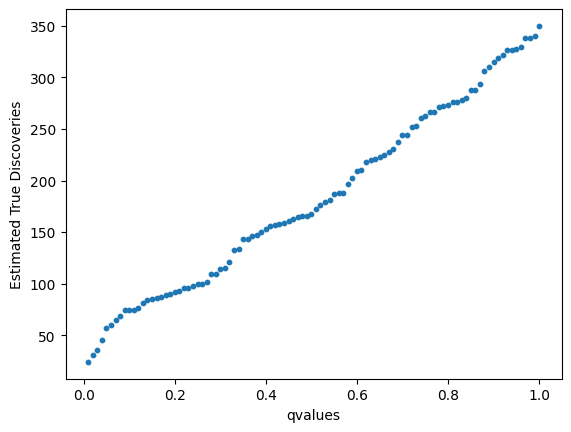

In [53]:
#Create DataFrame and plot q's against expected true discoveries
df = pd.DataFrame({'q_values': q_values, 'true_discoveries': true_counts})
plt.scatter(df['q_values'],df['true_discoveries'], s=10)
plt.xlabel('qvalues')
plt.ylabel('Estimated True Discoveries')
plt.show()

### c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR. (2pts)

### Insights
- Comparing the two models results of discoveries under 0.1 q, the model with interaction terms seems to have much more estimated true discoveries than the original model

- Under any other q levels, we can also see that the new model has way more estimated true discoveries, and the trend from the sensitivity analysis seems more smooth, no sudden spikes

- Overall, the new model shows better performance either comparing the fit and explainability of the model, or the robustness of the predictors that are identified as statisticaly significant.